# Общие свойства наночастиц различной природы

# Конспект лекции

## Гомогенная нуклеация нанокристаллов из раствора

Когда концентрация растворенного вещества $C$ в растворителе превышает его равновесную растворимость $C_0$ или температура опускается ниже точки фазового перехода, возникает новая фаза. Полная энергия системы уменьшается за счет выпадения растворенного вещества в твердой фазе. Уменьшение энергии Гиббса является движущей силой как нуклеации, так и роста частиц.

Для сферической частицы радиусом $r$ изменение полное изменение химического потенциала описывается

$$\Delta G = \Delta \mu_V + \Delta \mu_S = \frac{4}{3}\pi r^3 \Delta G_V + 4\pi r^2 \gamma,$$

где $\Delta G_V$ — удельное объемное изменение энергии Гиббса:

$$\Delta G_V = -\dfrac{kT}{V \ln(1+\sigma)},$$

$V$ — объем твердой фазы, $\sigma=\frac{C-C_0}{C_0}$ — концентрационное пересыщение.

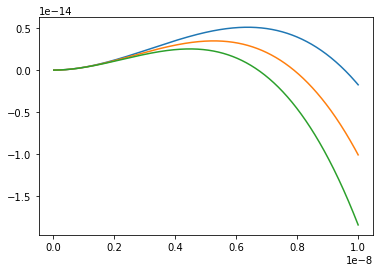

In [107]:
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(1e-11, 1e-8, 1000)
V = 4/3*np.pi*r**3

k = 1.38e-23

T = 273 + 200
sigma = 1      # пересыщение
gamma = 30     # порядки поверхностного натяжения для твердых тел - не менее 1 Н/м

def Delta_G(r, T, sigma, gamma):
    Delta_G_V = -k*T/(np.log(1+sigma))/1e-30
    Delta_mu_V = 4/3*np.pi*r**3*Delta_G_V
    Delta_mu_S = 4*np.pi*r**2*gamma
    #print(Delta_mu_V, Delta_mu_S)
    return Delta_mu_V+Delta_mu_S

plt.plot(r, Delta_G(r, T, sigma, gamma))
plt.plot(r, Delta_G(r, T+100, sigma, gamma))
plt.plot(r, Delta_G(r, T+200, sigma, gamma))

## Гетерогенная нуклеация

Когда новая фаза образуется на поверхности другого материала, такой процесс называется гетерогенной нуклеацией. Рассмотрим процесс гетерогенной нуклеации на плоской твердой подложке. Предположим, что компоненты наращиваемого вещества осаждаются на поверхности подложки из газовой фазы, мигрируют и агрегируют с образованием ядра округлой формы. Как и в случае гомогенной нуклеации, это сопровождается уменьшением свободной энергии Гиббса и увеличением поверхностной энергии. Общее изменение $\Delta G$, связанное с образованием ядра описывается формулой:

$$
\Delta G = a_1 r^2 \gamma_{vf} + a_2r^2(\gamma_{fs}-\gamma_{sv}) + a_3 r^3 \Delta \mu_V,
$$

где $r$ — средний радиус ядра, $\gamma_{vf}$, $\gamma_{fs}$, $\gamma_{sv}$ — энергия на единицу границы раздела газ-ядро, ядро-подложка, подложка-газ соответственно, $\Delta \mu_V$ — изменение свободной энергии Гиббса на единицу объема. Геометрические постоянные:

$$a_1 = 2\pi (1-\cos \theta),$$

$$a_2 = \pi \sin^2 \theta,$$

$$a_3 = 3\pi (2 - 3 \cos \theta + \cos^2 \theta),$$

где $\theta$ — контактный угол, который зависит только от свойств контактирующих поверхностей и определяется по уравнению Юнга:

$$
\gamma_{sv} = \gamma_{fs} + \gamma_{vf}\cos \theta.
$$

Образующееся ядро будет стабильным, если его радиус будет больше критического радиуса $r_c$:

$$
r_c = \dfrac{2(a_2\gamma_{sv}-a_2\gamma_{fs}-a_1\gamma_{vf})}{3a_3\Delta G_V}.
$$

Подставляя геометрические постоянные, получаем:

$$
r_c = \dfrac{2\pi\gamma_{vf}}{\Delta G_V} \dfrac{\sin^2\theta \cos \theta + 2 \cos \theta - 2}{2 - 3 \cos \theta + \cos^3 \theta}.
$$

Видно, что первый множитель выражения связан с критическим энергетическим барьером для гомогенной нуклеации, а второй представляет собой фактор смачивания. Если контактный угол равен 180, т.е. новая фаза совершенно не смачивает подложку, фактор смачивания равен единице и величина критического зародыша равна величине для гомогенной нуклеации.

## Синтез в мицеллах

Синтез наночастиц можно осуществлять, проводя реакцию в органическом пространстве. Примером этого метода служит синтез наночастиц в мицеллах или микроэмульсиях.

## Коллоидная устойчивость

<img src="Figs/two_gold_nanoparticles.png" />

Рис. Серия электронных микрофотографий (ПЭМ ВР), изображающих коагуляцию двух наночастиц золота. Ориентация плоскостей кристаллической решетки изменяется от кадра к кадру, указывая на движение частиц. Во время коагуляции граница зерен не образуется, а выравнивается ориентация двух частиц друг относительно друга. В процессе коагуляции результирующая частица становится все более округленной

## Способы управления седиментационной устойчивостью дисперсионных систем. Седиментационный анализ и оптичесеские методы определения размеров частиц и $\zeta$-потенциала

Рассмотрим задачу о движении круглого твердого тела радиуса $r$ массой $m$ из материала с плотностью $\rho_s$ в жидкой среде с плотностью $\rho_l$ и lдинамической вязкостью $\eta$. Движению тела вниз способствует сила тяжести $F_g$, но противодействуют сила Архимеда и сила трения. В соответствии с первым законом Ньютона получаем:

$$F_A + F_\text{тр} - F_g = 0.$$

Опишем каждую компоненту, учитывая [закон Стокса](https://ru.wikipedia.org/wiki/Закон_Стокса):

$$\rho_l g V_s + 6 \pi \eta r v_s = m_s g,$$

$$\rho_l g V_s + 6 \pi \eta r v_s = \rho_s g V_s$$.

Выразим отсюда скорость движения частицы с учетом рассмотренных сил:

$$v_s = \dfrac{2 r^2 g (\rho_l-\rho_s)}{9 \eta}.$$

В случае малых частиц формой частиц обычно принебрегают так как есть смысл говоришь лишь о некотором *гидродинамическом* радиусе. В этом рассмотрении важно, что частицы не взаимодействуют друг с другом.

Если рассматривать только указанные силы, то любое тело с плотностью большей, чем плотность жидкости должно опускаться на дно сосуда. Однако наночастицы в коллоидном растворе остаются устойчивы неограниченно долгое времея. Что пока не учитывает описанная модель? Броуновское тепловое движение.

Средняя кинетическая энергия частицы равна средней кинетической энергии молекул, вызывающих броуновское движение:

$$\dfrac{mv_T^2}{2} = \dfrac{3}{2}kT,$$

$$v_T = \sqrt{\dfrac{3kT}{m}} = \dfrac{3}{2}\sqrt{\dfrac{kT}{\rho_s \pi r^3}} .$$

In [8]:
import os
os.chdir('../Data')

import numpy as np
import pandas as pd    # библиотека для работы с табличными данными
import matplotlib.pyplot as plt


def v_s(r, rho_l, rho_s, eta):
    g = 9.81
    return 2*r**2*(rho_s-rho_l)/(9*eta)

def v_T(r, rho_s, T):
    k = 1.38e-23
    return 1.5**np.sqrt(k*T/(rho_s*np.pi*r**3))

In [64]:
metals = pd.read_csv("metals.csv")
liquids = pd.read_csv("liquids.csv")

rho_s = metals[metals['Формула'] == 'Au']['Плотность, г/см3'].item()*1000
rho_l = liquids[liquids['Название'] == 'Вода']['Плотность, г/см3'].item()*1000
eta = liquids[liquids['Название'] == 'Вода']['Динамическая вязкость, Па*с'].item()

T = 298
r = 10e-9

print("Скорость седиментации равна {:.1e} м/с.".format(v_s(r, rho_l, rho_s, eta)))
print("Скорость теплового движения равна {:.1e} м/с.".format(v_T(r, rho_s, T)))
print("Отношение тепловой скорости к скорости седиментации составляет {:.2e}.".format(v_T(r, rho_s, T)/v_s(r, rho_l, rho_s, eta)))

Скорость седиментации равна 4.6e-10 м/с.
Скорость теплового движения равна 1.1e+00 м/с.
Отношение тепловой скорости к скорости седиментации составляет 2.43e+09.


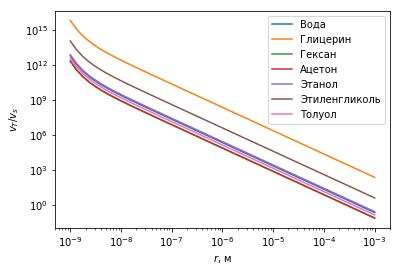

In [76]:
# при комнатной температуре

r = np.geomspace(1e-9, 1e-3)
plt.xlabel('$r$, м')
plt.ylabel('$v_T/v_s$')

for index, liquid in liquids.iterrows():
    rho_l = liquid['Плотность, г/см3']
    eta = liquid['Динамическая вязкость, Па*с']
    plt.loglog(r, v_T(r, rho_s, T)/v_s(r, rho_l, rho_s, eta), '-', label=liquid['Название'])

plt.legend()
plt.show()

Среднее смещение частицы $\Delta$ c учетом вязкости среды определяется коэффициентом диффузии $D$ и временем наблюдения $t$:

$$\Delta = \sqrt{2Dt}.$$

Выражение для коэффициента диффузии частиц, участвующих броуновским движением было определено А.Эйнштейном:

$$D = \dfrac{kT}{ 6 \pi \eta r}.$$

Если $v_s > v_T$ происходит седиментация, в обратном случае раствор седиментационно устойчив. Известно, что крупные частицы с размерами более 5 мкм в броуновском движении практически не участвуют (неподвижны или седиментируют), более мелкие частицы (менее 3 мкм) двигаются поступательно по весьма сложным траекториям или вращаются.

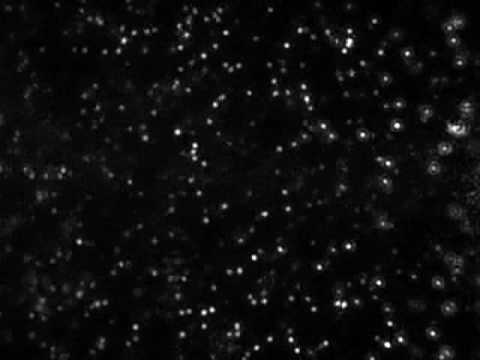

In [1]:
'''На видео ниже представлена иллюстрация броуновского движения.
Наблюдаемые вспышки - рассеиваемое наночастицами лазерное излучение.'''

from IPython.lib.display import YouTubeVideo
YouTubeVideo('cDcprgWiQEY')

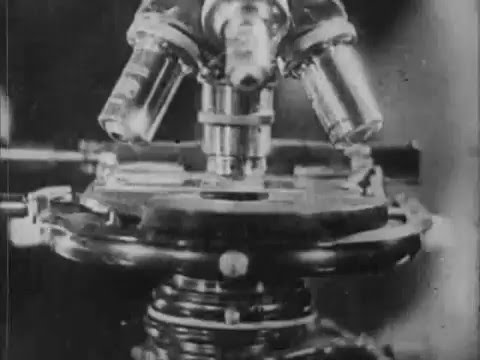

In [2]:
'''Немой фильм 1937 г. о Броуновском движении'''

from IPython.lib.display import YouTubeVideo
YouTubeVideo('7YhAnYiIwSE')

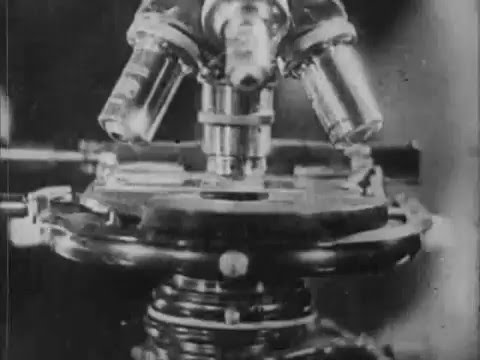

In [3]:
'''Метод очистки газа от малых частиц в присутствии
электрического поля'''

from IPython.lib.display import YouTubeVideo
YouTubeVideo('7YhAnYiIwSE')

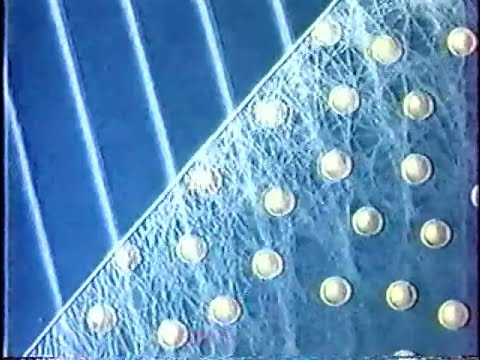

In [4]:
'''Дисперсия и рассеяние света'''

from IPython.lib.display import YouTubeVideo
YouTubeVideo('gW6sMiM3ZDc')

# Методы оценки размера частиц

Кристаллическая структура наноматериалов определяется расположением (упаковкой) атомов, находящихся на расстоянии порядка 0,1 нм друг от друга. На основе анализа дифракционной картины можно идентифицировать кристаллическую фазу материала. Рассеяние на малые углы используется для оценки среднего расстояния между частицами, в то время как дифракция на большие углы применяется для установления атомной структуры наночастиц.

Ширина дифракционных линий тесно связана с размером частиц и их распределением по размеру, а также с дефектами и деформацией нанокристаллов. С уменьшением размера нанокристалла ширина дифракционных линий увеличивается из-за потери дальнего порядка в сравнении с объемным материалом. По шириней линий дифракции можно оценить размер наночастиц, используя формулу Дебая-Шеррера:

$a = \dfrac{0,9\lambda}{B \cos(\theta)},$

где $a$ — размер частицы, $\lambda$ — длина волны рентгеновского излучения, $B$ — полуширина (полная ширина на половине высоты, в радианах) пика рассеянного рентгеновского излучения и $\theta$ — угол Брэгга. Однако уширение линий дифракции приводит к ошибке при анализе структуры частиц с размерами менее 1 нм.

# Электрофоретическое осаждение и понятие зета-потенциала

Метод электрофоретического осаждения заключается в осаждении в присутствии электрического поля наночастиц из коллоидного раствора на поверхность одного из электродов. Электрофоетическое осаждение имеет ряд отличий от электрохимического. Во-первых, при электрофоретическом осаждении, частицы обладают существенно большей массой, чем ионы при электрохимическом осаждении. Во-вторых, наноразмерные частицы в коллоидной дисперсии обычно стабилизированы электростатически или электростерически за счет поверхностно-активных веществ. При диспергировании в полярном растворитеел или в растворе электролита на поверхности наночастиц появляется электрические заряд вследствтие одного или нескольких механизмов:
- частичное растворение
- адсорбция заряда или заряженных частиц
- восстановление или окисление
- физическая адсорбция заряженных частиц полимеров

Комбинация электростатических сил, броуновского движения и осмотических сил приводят к формированию двойного электрического слоя. Электрический потенциал уменьшается с расстоянием. Около поверхности в слое, называемом слой Штерна, потенциал уменьшается линейно, а за пределами слоя Штерна — в диффузионном слое — экспоненциально. Вместе слой Штерна и диффузионный слой образуют структуру двойного электрического слоя.

При приложении внешнего электрического поля заряженные частицы приходят в движение. При движении заряженной частицы часть раствора, окружающая частицу и прочно связанная с ней, будет также двигаться. Плоскость, которая отделяет прочно связанную жидкую пленку от остальной части жидкости, называются «плоскостью скольжения». Электрический потенциал в плоскости скольжения известен как *зета-потенциал*. Этот параметр опрееделяет устойчивость коллоидной дисперсии. Зета-потенциал больше 25 мВ соответствует стабильным дисперсным системам. Величина зета-потенциала может быть выражена следующим образом:

$$\zeta = \dfrac{Q}{4\pi\varepsilon r(1+\kappa r)},$$

где $\kappa$ определяется как 
$$\kappa = \sqrt{\dfrac{\sum{n_iz_i^2e^2}}{\varepsilon \varepsilon_0 kT}},$$

$Q$ — заряд на частице, $r$ — радиус частицы по плоскости скольжения, $\varepsilon$ — относительная диэлектрическая проницаемость среды, $n_i$ и $z_i$ — объемная концентрация и валентность $i$-го иона в системе соответственно. 

Подвижность наночастицы в коллоидном растворе $\mu$ зависит от относительной диэлектрической проницаемости и вязкости жидкой среды $\eta$, зета-потенциала наночастицы $\zeta$. Зависимость описывает уравнение Хюккеля:

$$\mu = \dfrac{2\varepsilon\varepsilon_0\zeta}{3\pi\eta}.$$

В результате передачи заряда от электрода происходит разрушение двойного электрического слоя и частицы осаждаются на электроде. Обычно при электрофоретическом осаждения происходит образование пористого материала. Плотность можно повысить за счет более медленного протекания процесса электрофоретического осаждения в более слабых полях, а также поля, в которой кроме постоянной составляющей имеется меньший по амплитуде переменный сигнал.

In [ ]:
# Результат процесса электрофоретического осаждения частиц оксида алюминия

from IPython.lib.display import YouTubeVideo
YouTubeVideo('FvSgyZBZr5s')

# Задачи и упражнения

1. Мыло образует сферические мицеллы радиусом 12.5 нм. Площадь поперечного сечения «аниона мыла» в адсорбционном насыщенном слое равна 0.25 нм$^2$ . Длина «аниона мыла» составляет приблизительно 2.5 нм. Мицеллы мыла начинают появляться, если
концентрация мыла превышает $1.8\cdot10^{-5}$ М. Задания:
    - Сколько пачек мыла нужно растворить в ванне площадью 1 м$^2$, чтобы полностью покрыть ее адсорбционным монослоем? Масса пачки 100 г.
    - Сколько «анионов мыла» формируют мицеллу? Сколько мицелл
может образоваться из пачки мыла?
    - Каково среднее расстояние между «анионами мыла» в растворе, концентрация которого $1.8\cdot10^{-5}$ М?

# Литература